<a href="https://colab.research.google.com/github/woodskd24/ChocolateHackathon/blob/main/PredictiveChocolateModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [3]:
choco = pd.read_csv("/content/drive/MyDrive/ChocolateCleanOfficial1.csv")

In [4]:
choco.head()

,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,creamy,...,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients,ingredient_vanilla
0,7,20,76.0,3.25,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,3.0,0
1,7,14,76.0,3.50,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,3.0,0
2,7,16,76.0,3.75,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,3.0,0
3,7,6,68.0,3.00,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,3.0,0
4,7,6,80.0,3.25,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,3.0,0


In [6]:
%matplotlib inline

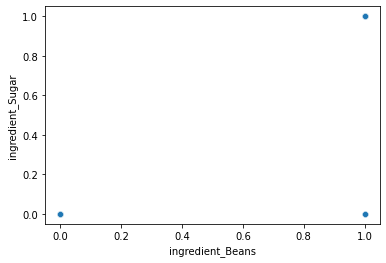

In [7]:
sns.scatterplot(x = "ingredient_Beans", y = "ingredient_Sugar", data = choco)

In [8]:
x = choco[['ingredient_Beans']]
y = choco[['ingredient_Sugar']]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [10]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [11]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  [-5.88418203e-15]
Coefficient:  [[0.99791811]]


In [12]:
y_pred_slr= slr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [[ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.97918112e-01]
 [ 9.9

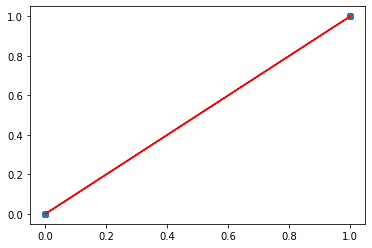

In [14]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred_slr, 'Red')
plt.show()

In [15]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(slr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.75
Mean Absolute Error: 0.0020167267775051904
Mean Square Error: 4.198598426450015e-06
Root Mean Square Error: 0.002049048175726968
